In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import time
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd
import urllib
import requests
import re
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

def replaceString(inputFile,outputFile,):          
    # Read in the file
    with open(inputFile, 'r') as file :
      filedata = file.read()

    # Replace two or more spaces for one
    filedata = re.sub(" +", " ", filedata);

    # Write the file out again
    with open(outputFile, 'w') as file:
      file.write(filedata)

                  
urls = ['http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data',
        'http://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.names']

def load_dataset(path, urls):
    if not os.path.exists(path):
        os.mkdir(path)

    for url in urls:
        data = requests.get(url).content
        filename = os.path.join(path, os.path.basename(url))
        with open(filename, "wb") as file:
            file.write(data)
    replaceString('data/yeast.data','data/yeast.data')
    


In [20]:
load_dataset('data', urls)
columns = ['id','mcg','gah','alm','mit','erl','pox','vac','nun' ,'classDist']
df = pd.read_csv('data/yeast.data', names=columns, sep=' ', na_values='?')
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df)

              id   mcg   gah   alm   mit  erl   pox   vac   nun classDist
0     ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.00  0.48  0.22       MIT
1     ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.00  0.53  0.22       MIT
2     ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.00  0.53  0.22       MIT
3     AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.00  0.54  0.22       NUC
4     AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.00  0.48  0.22       MIT
5     AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.50  0.49  0.22       CYT
6     ABC1_YEAST  0.50  0.54  0.48  0.65  0.5  0.00  0.53  0.22       MIT
7     BAF1_YEAST  0.48  0.45  0.59  0.20  0.5  0.00  0.58  0.34       NUC
8     ABF2_YEAST  0.55  0.50  0.66  0.36  0.5  0.00  0.49  0.22       MIT
9     ABP1_YEAST  0.40  0.39  0.60  0.15  0.5  0.00  0.58  0.30       CYT
10    ACE1_YEAST  0.43  0.39  0.54  0.21  0.5  0.00  0.53  0.27       NUC
11    ACE2_YEAST  0.42  0.37  0.59  0.20  0.5  0.00  0.52  0.29       NUC
12    ACH1_YEAST  0.40  0.42  0.57  0.

In [21]:
####  Print dataframe
df.head()
df = df.drop(['id'], axis=1)

In [22]:
##### Prints dataframe info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
mcg          1484 non-null float64
gah          1484 non-null float64
alm          1484 non-null float64
mit          1484 non-null float64
erl          1484 non-null float64
pox          1484 non-null float64
vac          1484 non-null float64
nun          1484 non-null float64
classDist    1484 non-null object
dtypes: float64(8), object(1)
memory usage: 104.4+ KB


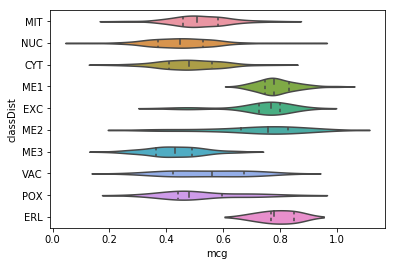

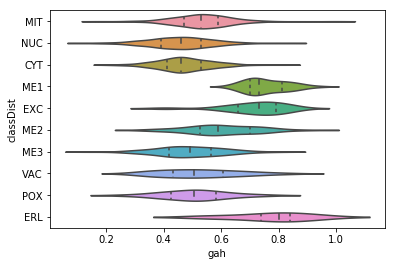

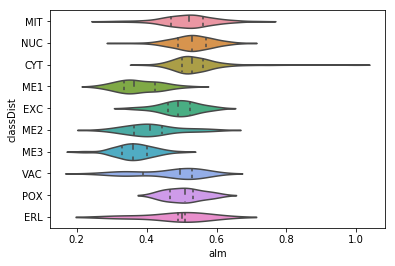

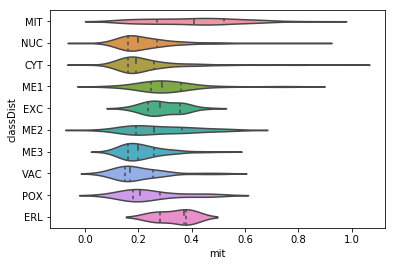

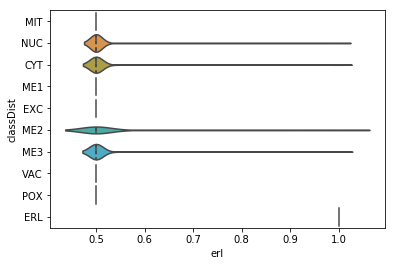

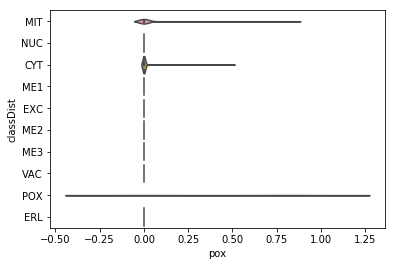

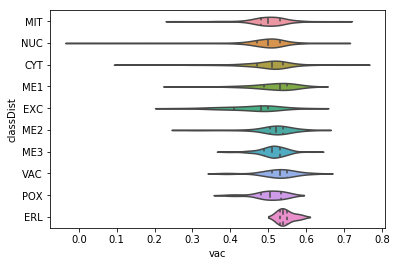

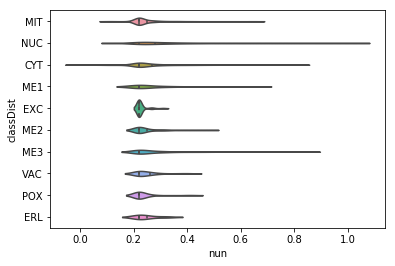

In [23]:
g = sns.violinplot(y='classDist', x='mcg', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classDist', x='gah', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classDist', x='alm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classDist', x='mit', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classDist', x='erl', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classDist', x='pox', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classDist', x='vac', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='classDist', x='nun', data=df, inner='quartile')
plt.show()

In [24]:
##### Encondes the dataframe in order to replace strings with floats 
encode = LabelEncoder()
#To restrict the number of classes with less than 50 occurancies uncomment the line bellow
#df = df.groupby("classDist").filter(lambda x: len(x) > 50)
print(df.classDist.value_counts())
df['classDist'] = encode.fit_transform(df['classDist'].astype(str))

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: classDist, dtype: int64


In [25]:
########## Modeling with scikit-learn ####
X = df.drop(['classDist'], axis=1)
y = df['classDist']
print(X.head())
print(X.shape)
print(y.head())
print(y.shape)

    mcg   gah   alm   mit  erl  pox   vac   nun
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
4  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
(1484, 8)
0    6
1    6
2    6
3    7
4    6
Name: classDist, dtype: int64
(1484,)


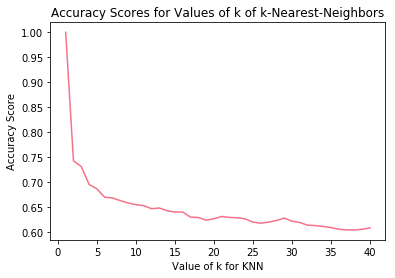

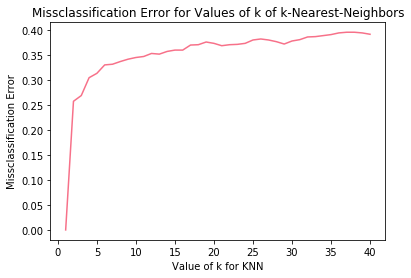

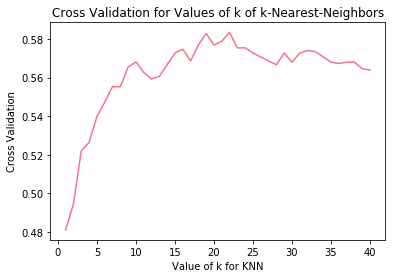

Time spent: 2.9335596561431885 seconds

Ideal k value 22 with score 0.5834970529189843


In [26]:
from sklearn.model_selection import cross_val_score
start = time.time()
k_range = [] 
ideal = [0,0]
for x in range(1,41):
  k_range.append(x*1)

scores = []
cv = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    cv_scores = cross_val_score(knn, X, y, cv=5)
    cv.append(np.mean(cv_scores))
    if ideal[1] < np.mean(cv_scores):
        ideal = [k,np.mean(cv_scores)]
    
MSE = [1 - x for x in scores]
end = time.time()
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, MSE)
plt.xlabel('Value of k for KNN')
plt.ylabel('Missclassification Error')
plt.title('Missclassification Error for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, cv)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross Validation')
plt.title('Cross Validation for Values of k of k-Nearest-Neighbors')
plt.show()

timeSpent = end - start

print('Time spent: {} seconds'.format(timeSpent))
print()
print('Ideal k value {} with score {}'.format(ideal[0],ideal[1]))


In [ ]:

y_pred = knn.predict(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print("KNN accuracy score:" ,metrics.accuracy_score(y, y_pred))
# Train the model on the training set
logreg = LogisticRegression(solver = "lbfgs", multi_class = "multinomial", max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test)

# try K=1 through K=40 and record testing accuracy
start = time.time()

k_range = range(1, 41)
scores = []
cv = []
ideal = [0,0]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    thisScore = metrics.accuracy_score(y_test, y_pred)
    if ideal[1] < thisScore:
        ideal = [k,thisScore]
    
end = time.time()


def confusionMatrix():
    print("Confusion Matrix - K = {}".format(ideal[0]))
    knn = KNeighborsClassifier(n_neighbors=ideal[0])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    knn_CM = confusion_matrix(y_test,y_pred)
    df_confusion = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
    confusionM_df = pd.DataFrame(knn_CM,
                     index = ['CYT','NUC','MIT','ME3','ME2','ME1','EXC','VAC','POX','ERL'], 
                     columns = ['CYT','NUC','MIT','ME3','ME2','ME1','EXC','VAC','POX','ERL'])
    plt.figure(figsize=(5.5,4))
    sns.heatmap(confusionM_df, annot=True)
    plt.title('KNN Confusion Matrix \nAccuracy:{0:.3f} '.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print('Mean Absolut Error: {}'.format(mae))
    

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
confusionMatrix()
timeSpent = end - start
print('Time spent overall: {} seconds'.format(timeSpent))

KNN accuracy score: 0.5741239892183289


In [ ]:
# Neural Network
nn = MLPClassifier(activation='relu',solver='adam', alpha=1e-5,max_iter=500,hidden_layer_sizes=(100,100,100), random_state=1,verbose=True)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=1)
start = time.time()
nn.fit(x_train, y_train)
end = time.time()
timeSpent = end - start
print('Time spent training: {} seconds'.format(timeSpent))

In [ ]:
# Metric analise from the neural network train
def neuralMetrics():
    print("Confusion Matrix: ")
    start = time.time()
    y_pred = nn.predict(x_test)
    end = time.time()
    mae = mean_absolute_error(y_test, y_pred)  
    neuralCM = confusion_matrix(y_test,y_pred)
    df_confusion = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'],margins=True)
    confusionM_df = pd.DataFrame(neuralCM,
                     index = ['CYT','NUC','MIT','ME3','ME2','ME1','EXC','VAC','POX','ERL'], 
                     columns = ['CYT','NUC','MIT','ME3','ME2','ME1','EXC','VAC','POX','ERL'])
    plt.figure(figsize=(5.5,4))
    sns.heatmap(confusionM_df, annot=True)
    plt.title('Neural Network Confusion Matrix \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    print("Mean Absolute Error: {}".format(mae))
       
timeSpent = end - start
neuralMetrics()
print("Time to obtain a solution: {}".format(timeSpent))

In [ ]:
# Support Vector Machine
y = encode.fit_transform(df['classDist'].astype(str))
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=1)

In [ ]:
# Support Vector Machine metrics
start = time.time()
svm = SVC(kernel = 'linear').fit(x_train,y_train)
end = time.time()
svm.predict(x_train)
y_pred = svm.predict(x_test)
confusionM = confusion_matrix(y_test, y_pred) 
mae= mean_absolute_error(y_test, y_pred)  

confusionM_df = pd.DataFrame(confusionM,
                      index = ['CYT','NUC','MIT','ME3','ME2','ME1','EXC','VAC','POX','ERL'], 
                     columns = ['CYT','NUC','MIT','ME3','ME2','ME1','EXC','VAC','POX','ERL'])


plt.figure(figsize=(5.5,4))
sns.heatmap(confusionM_df, annot=True)
plt.title('Support Vector Machine Confusion Matrix \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

timeSpent = end - start
print('Time spent training: {} seconds'.format(timeSpent))
print('Mean Absolut Error: {}'.format(mae))